In [4]:
import numpy as np
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn import neighbors
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


In [10]:
donnes = "../donnes/Donnes.csv"
names = ['Prix', 'Nombre d\'utilisateur','Excellent', 'Très bon','Moyen','Médiocre','Horrible', 'Nombre des étoiles', 'class']
df = pd.read_csv(donnes, names=names)
df

,Prix,Nombre d'utilisateur,Excellent,Très bon,Moyen,Médiocre,Horrible,Nombre des étoiles,class
0,180,1954,49,42,7,1,0,3,3
1,80,852,69,25,4,1,0,2,2
2,187,2158,29,51,15,4,0,4,3
3,106,1288,36,46,12,3,0,3,2
4,178,873,50,42,6,1,0,3,3
5,104,520,35,51,11,2,0,3,2
6,169,3258,31,50,13,0,0,4,3
7,177,576,80,15,3,1,0,4,3
8,68,190,35,46,15,2,0,0,1
9,123,1452,58,29,7,3,0,4,3


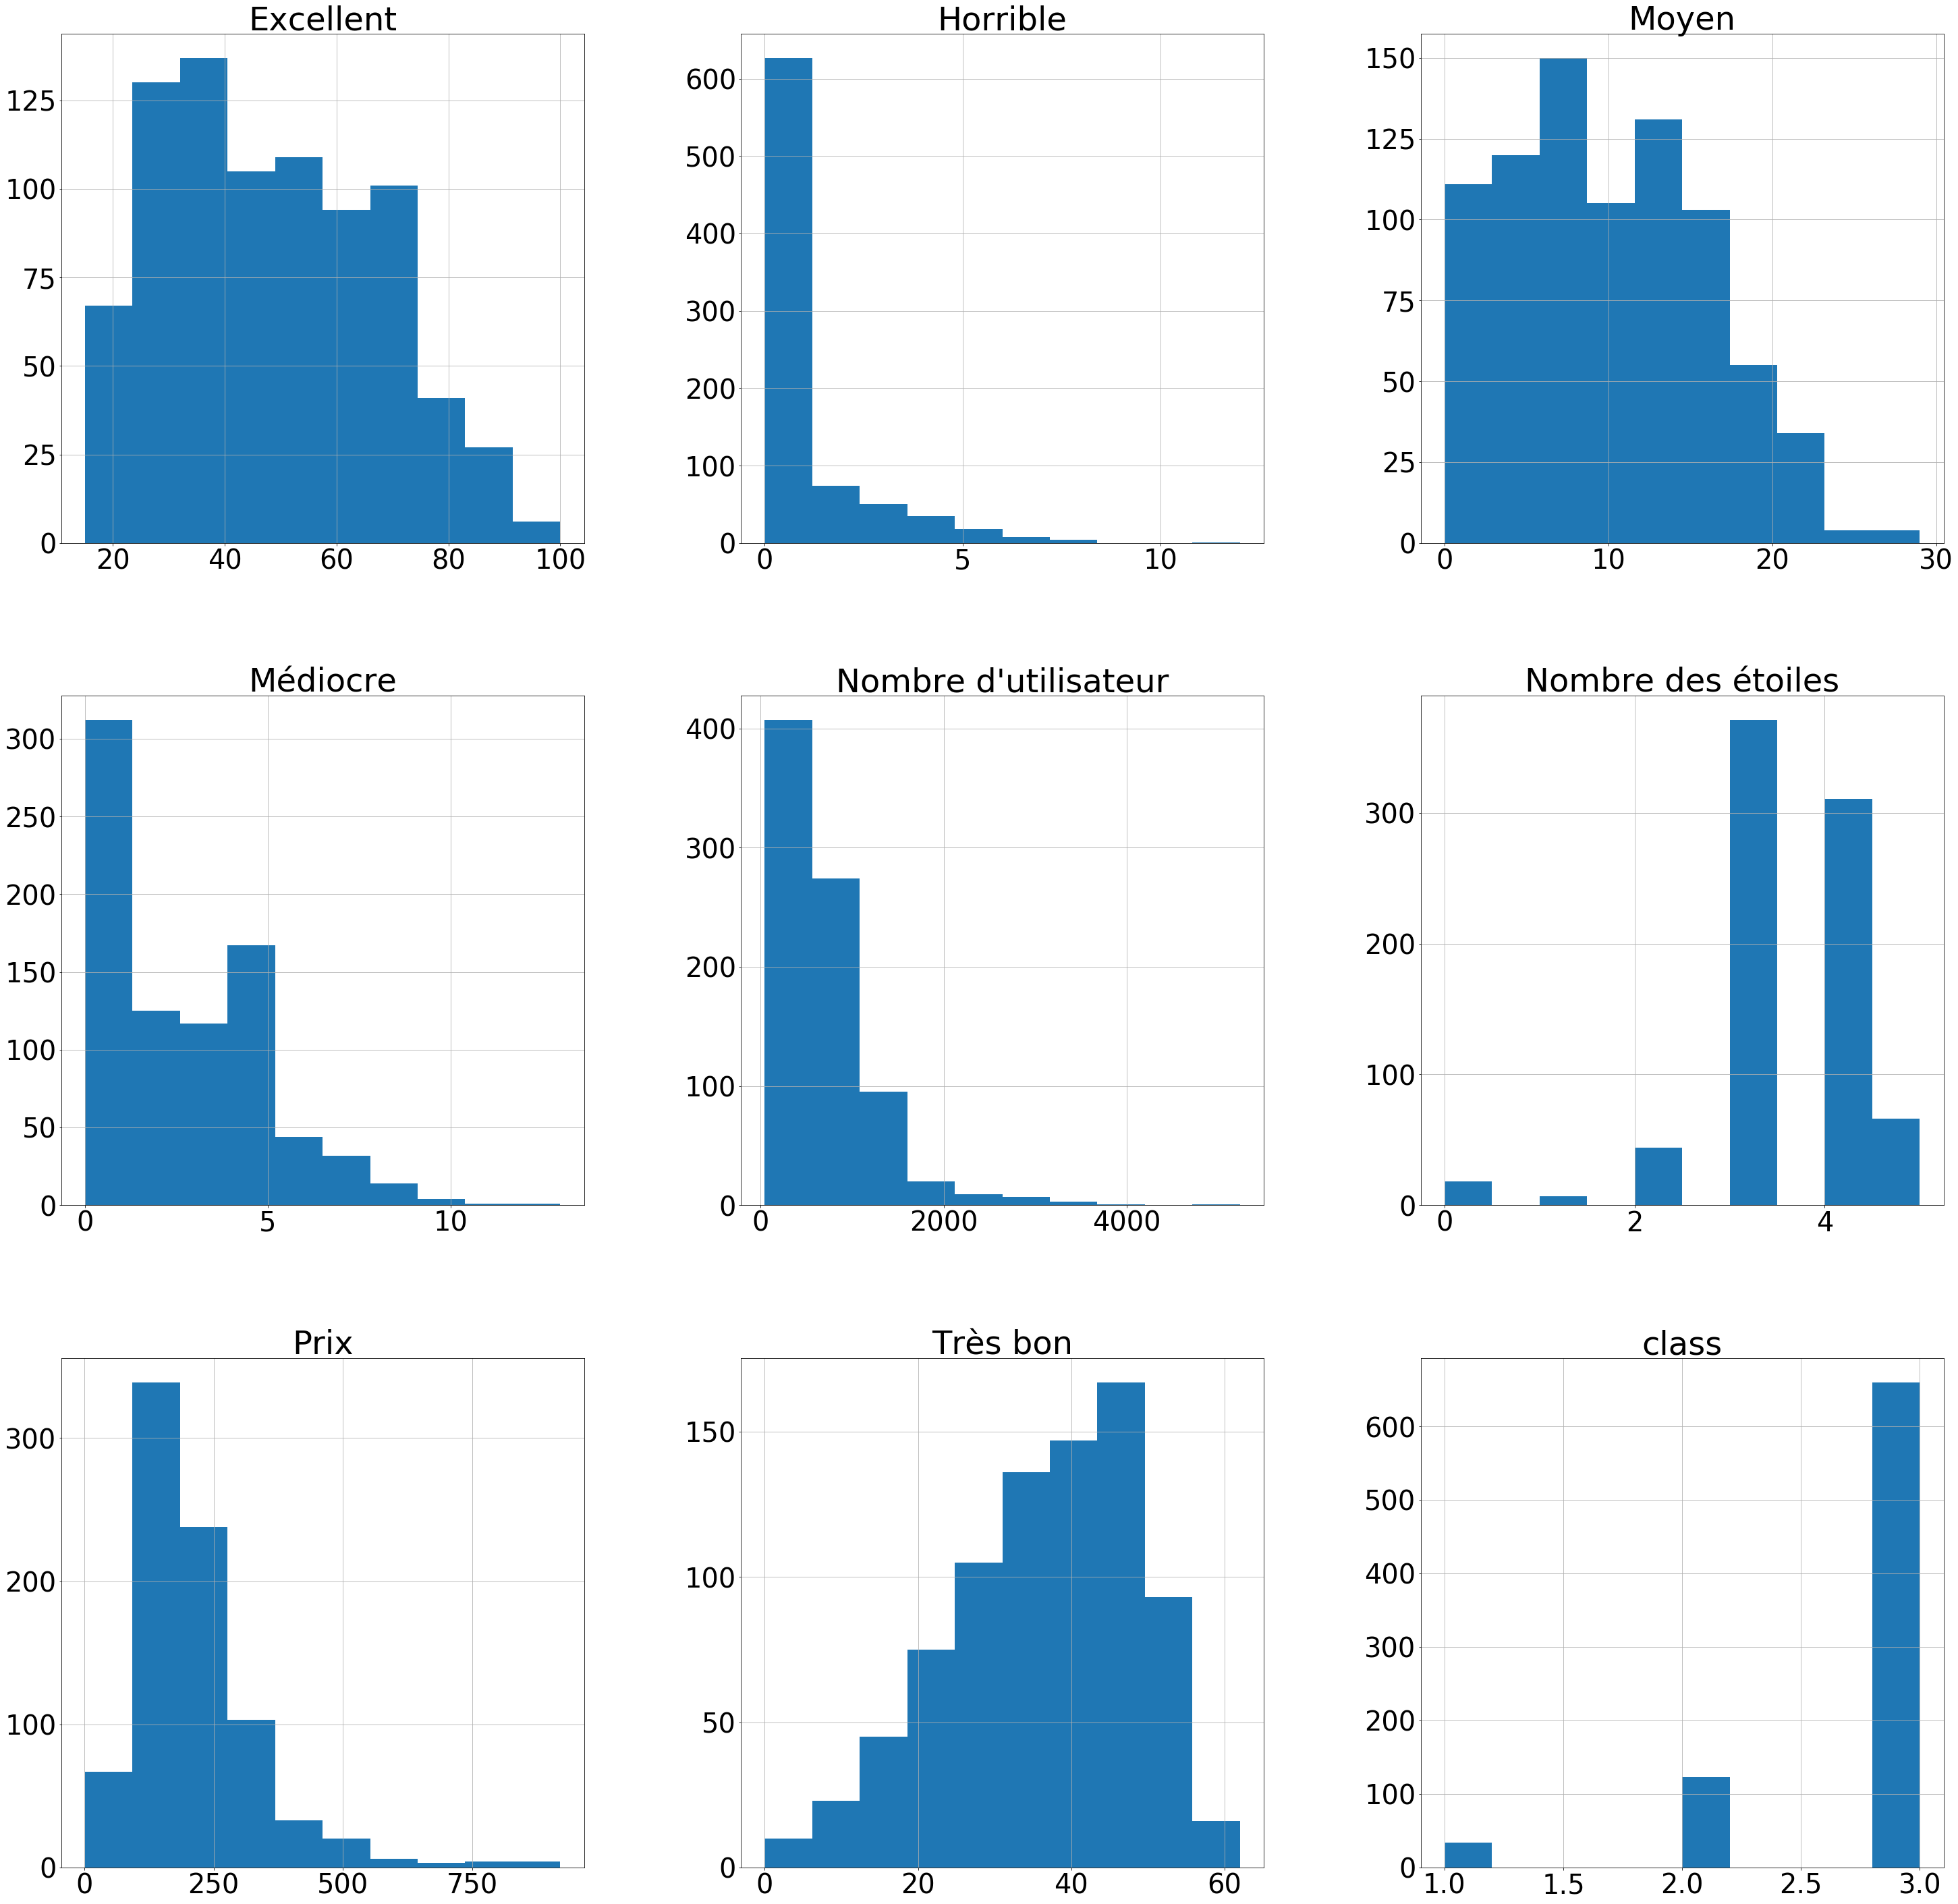

In [12]:
df.hist()
plt.rcParams["figure.figsize"] = (50, 50)
plt.rcParams.update({'font.size': 50})
plt.show()

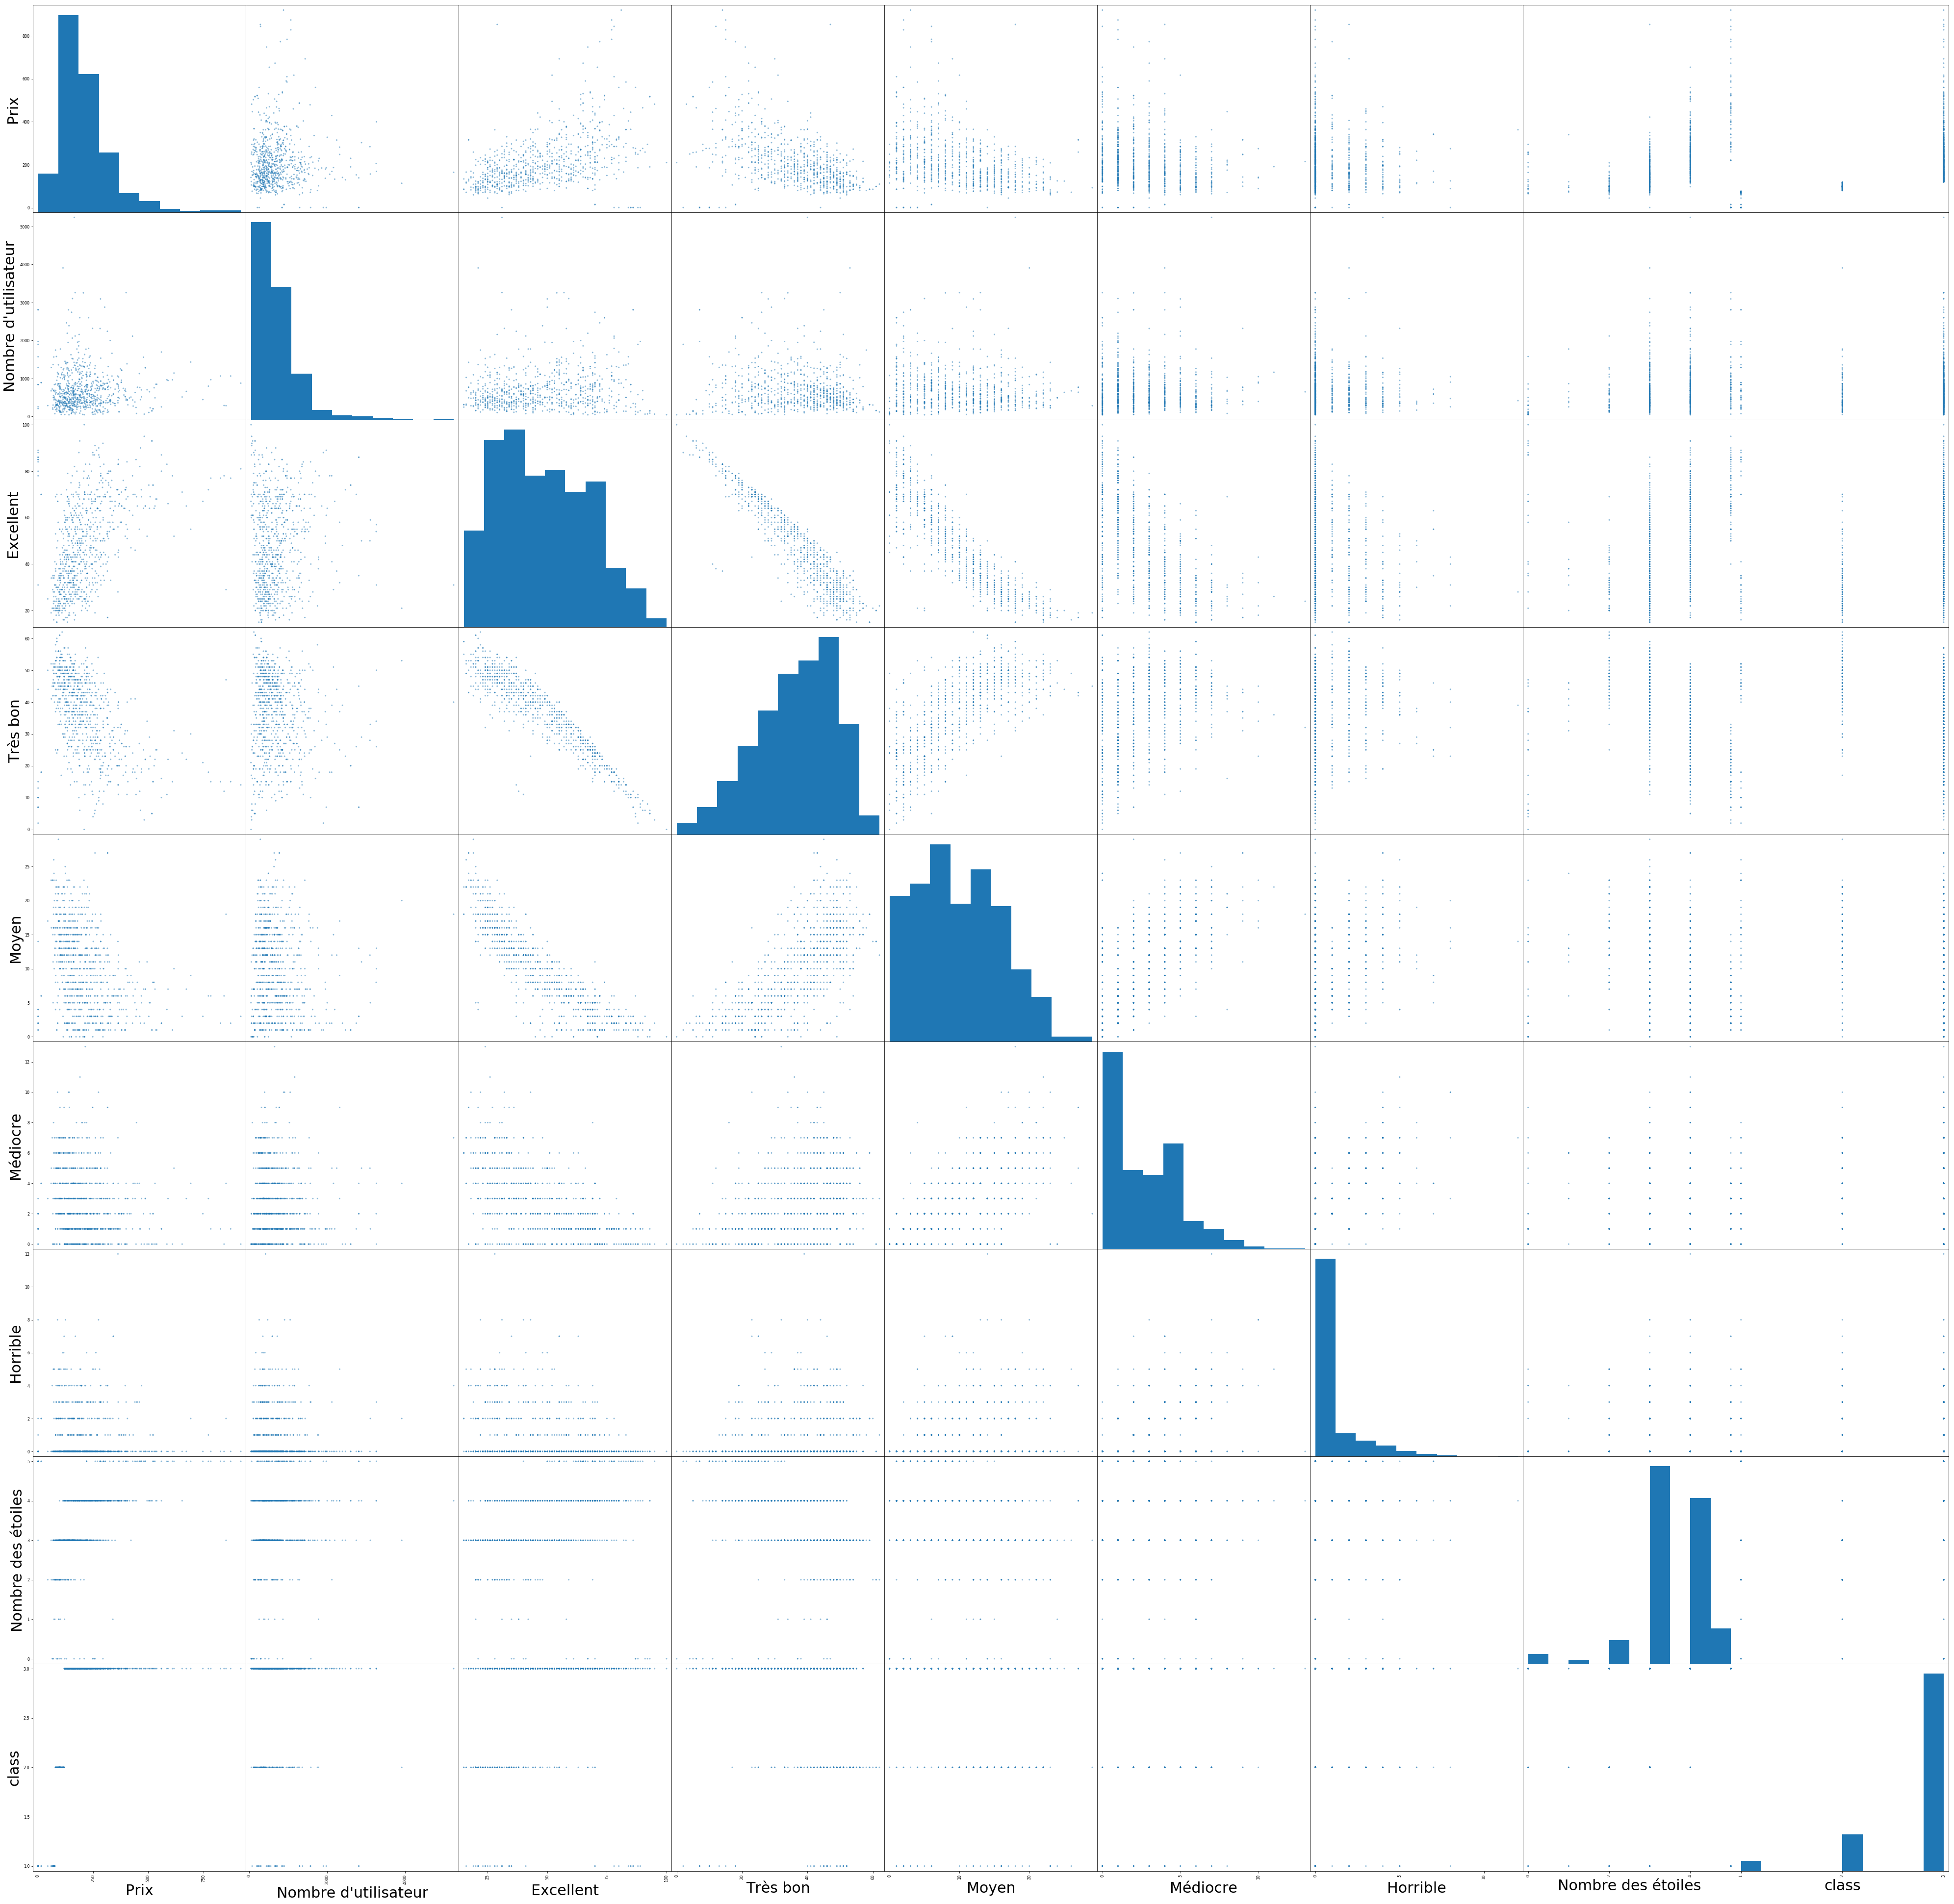

In [27]:
scatter_matrix(df)
plt.rcParams["figure.figsize"] = (70, 70)
plt.rcParams.update({'font.size': 30})
plt.show()

In [38]:
X = np.array(df.drop(['class', 'Prix', 'Nombre d\'utilisateur', 'Médiocre','Horrible'], 1))
y = np.array(df['class'])


In [39]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)


In [40]:
clf = neighbors.KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=2, n_neighbors=7, p=2,
           weights='uniform')
clf.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=2, n_neighbors=7, p=2,
           weights='uniform')

In [41]:
accuracy = clf.score(X_test, y_test)
print(accuracy)


0.8109756097560976


In [35]:
example_measures = np.array([40,89,100, 1])
example_measures = example_measures.reshape(1,-1)
prediction = clf.predict(example_measures)
print(prediction)


[1]
